In [37]:
import numpy as np

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
X_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X.npy")
X_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X_test.npy")
Y_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y.npy")
Y_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y_test.npy")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5670, 528), (3780, 528), (5670,), (3780,))

In [40]:
import scipy.io
from sklearn import svm
import os
import pandas as pd
import numpy as np
#from mat4py import loadmat
from sklearn import svm 
import time 
from sklearn.metrics import confusion_matrix

In [ ]:

import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
import matplotlib.pyplot as plt                         # for plotting
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, isdir

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      2100
           1       0.79      0.77      0.78      1680

    accuracy                           0.81      3780
   macro avg       0.81      0.80      0.80      3780
weighted avg       0.81      0.81      0.81      3780



In [ ]:

y_test_preds = logreg.predict(X_test)
cls1 = classification_report(Y_test,y_test_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_test,y_test_preds)

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      2100
           1       0.79      0.77      0.78      1680

    accuracy                           0.81      3780
   macro avg       0.81      0.80      0.80      3780
weighted avg       0.81      0.81      0.81      3780

------------COnfusion Matrix---------------


array([[1764,  336],
       [ 391, 1289]])

In [ ]:
y_train_preds = logreg.predict(X_train)
cls1 = classification_report(Y_train,y_train_preds)
print(cls1)
print("------------COnfusion Matrix---------------")
confusion_matrix(Y_train,y_train_preds)


              precision    recall  f1-score   support

          -1       0.88      0.89      0.89      3150
           1       0.86      0.85      0.86      2520

    accuracy                           0.87      5670
   macro avg       0.87      0.87      0.87      5670
weighted avg       0.87      0.87      0.87      5670

------------COnfusion Matrix---------------


array([[2803,  347],
       [ 373, 2147]])

In [ ]:
Y_test.shape, y_train_preds.shape

((3780,), (5670,))

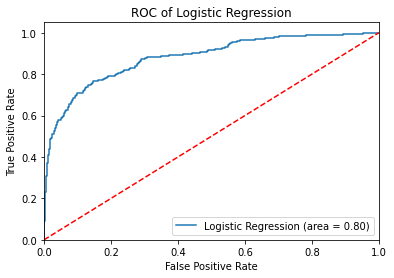

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Log Reg with Hyperparams Tuning  Link - https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
data_X = np.concatenate((X_train,X_test),axis=0)
data_Y=np.concatenate((Y_train,Y_test),axis=0)
print(data_X.shape)
print(data_Y.shape)

(9450, 528)
(9450,)


In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(data_X, data_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.868078 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.868078 (0.008207) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.858025 (0.008942) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.868078 (0.008207) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.861411 (0.009846) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.858413 (0.008736) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.861411 (0.009846) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.859683 (0.008299) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.859929 (0.007845) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.859718 (0.008236) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.848959 (0.008605) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848889 (0.008651) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848959 (0.008487) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.838342 (0.008322) wit

In [ ]:
model = LogisticRegression(**grid_result.best_params_)
model.fit(X_train,Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_d=model.predict(X_test)
y_pred_t = model.predict(X_train)

In [ ]:
print(confusion_matrix(Y_test,y_pred_d))
print(confusion_matrix(Y_train, y_pred_t))

[[1790  310]
 [ 427 1253]]
[[2817  333]
 [ 322 2198]]


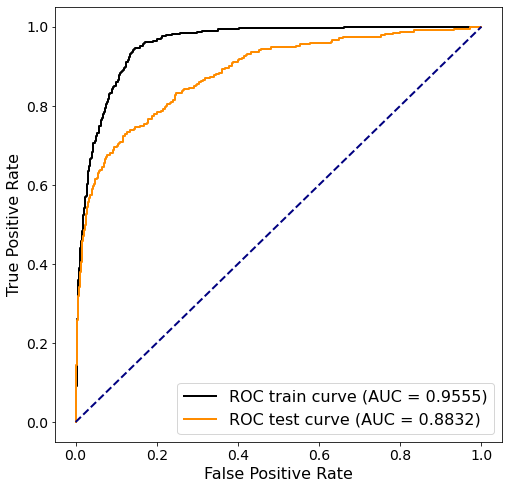

In [ ]:
y_probs = model.predict_proba(X_test)[:,1]
y_pred_train = model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

#DTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf_tree = DecisionTreeClassifier()
parameters = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2)
}
dt = GridSearchCV(clf_tree, param_grid = parameters, cv = 4)
dt.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                       

In [ ]:

dt.best_params_

{'max_depth': 19, 'min_samples_split': 10}

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 1, min_samples_split = 10)
dtc.fit(X_train,Y_train)
y_pred_d = dtc.predict(X_test)
print('ACC of Decision Tree classifier on test set:'+ "{0:.3f}".format(accuracy_score(Y_test, y_pred_d)))
print('AUC of Decision Tree classifier on test set:'+"{0:.3f}".format(roc_auc_score(Y_test, y_pred_d)))

ACC of Decision Tree classifier on test set:0.798
AUC of Decision Tree classifier on test set:0.800


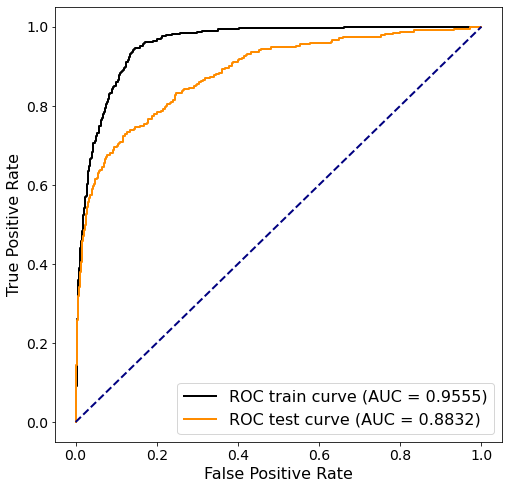

In [ ]:
y_probs = model.predict_proba(X_test)[:,1]
y_pred_train = model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)
y_pred_dt = dtc.predict(X_test)
print('ACC of Decision Tree classifier on test set:'+ "{0:.3f}".format(accuracy_score(Y_test, y_pred_dt)))
print('AUC of Decision Tree classifier on test set:'+"{0:.3f}".format(roc_auc_score(Y_test, y_pred_dt)))

ACC of Decision Tree classifier on test set:0.798
AUC of Decision Tree classifier on test set:0.800


#Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  6.7min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 1000,
 max_features = 3,
 max_depth = 80,
 bootstrap = True)
rf_clf.fit(X_train,Y_train)
y_pred_r = rf_clf.predict(X_test)

print('ACC of Randomforest classifier on test set:'+ "{0:.3f}".format(accuracy_score(Y_test, y_pred_r)))
print('AUC of Randomforest classifier on test set:'+"{0:.3f}".format(roc_auc_score(Y_test, y_pred_r)))

ACC of Randomforest classifier on test set:0.556
AUC of Randomforest classifier on test set:0.500


In [ ]:
r_roc_auc = roc_auc_score(y_test, y_pred_r)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % r_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of RandomForest (4-fold CV)')
plt.legend(loc="lower right")
plt.savefig('Randomforest_ROC')
plt.show()

NameError: ignored

#SVM